<a href="https://colab.research.google.com/github/amanda-araujo/inferencia-estatistica/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho - ANOVA (Analysis of Variance)


Introdução à Inferência Estatística (SME0221)

Profª Cibele Maria Russo Novelli

Instituto de Ciências Matemáticas e de Computação - Universidade de São Paulo (ICMC-USP)

*   Amanda Araujo - nº USP: 10260441
*   Veronica Fernandes Ferreira - nº USP: 12557355
*   João - nº USP:

2024

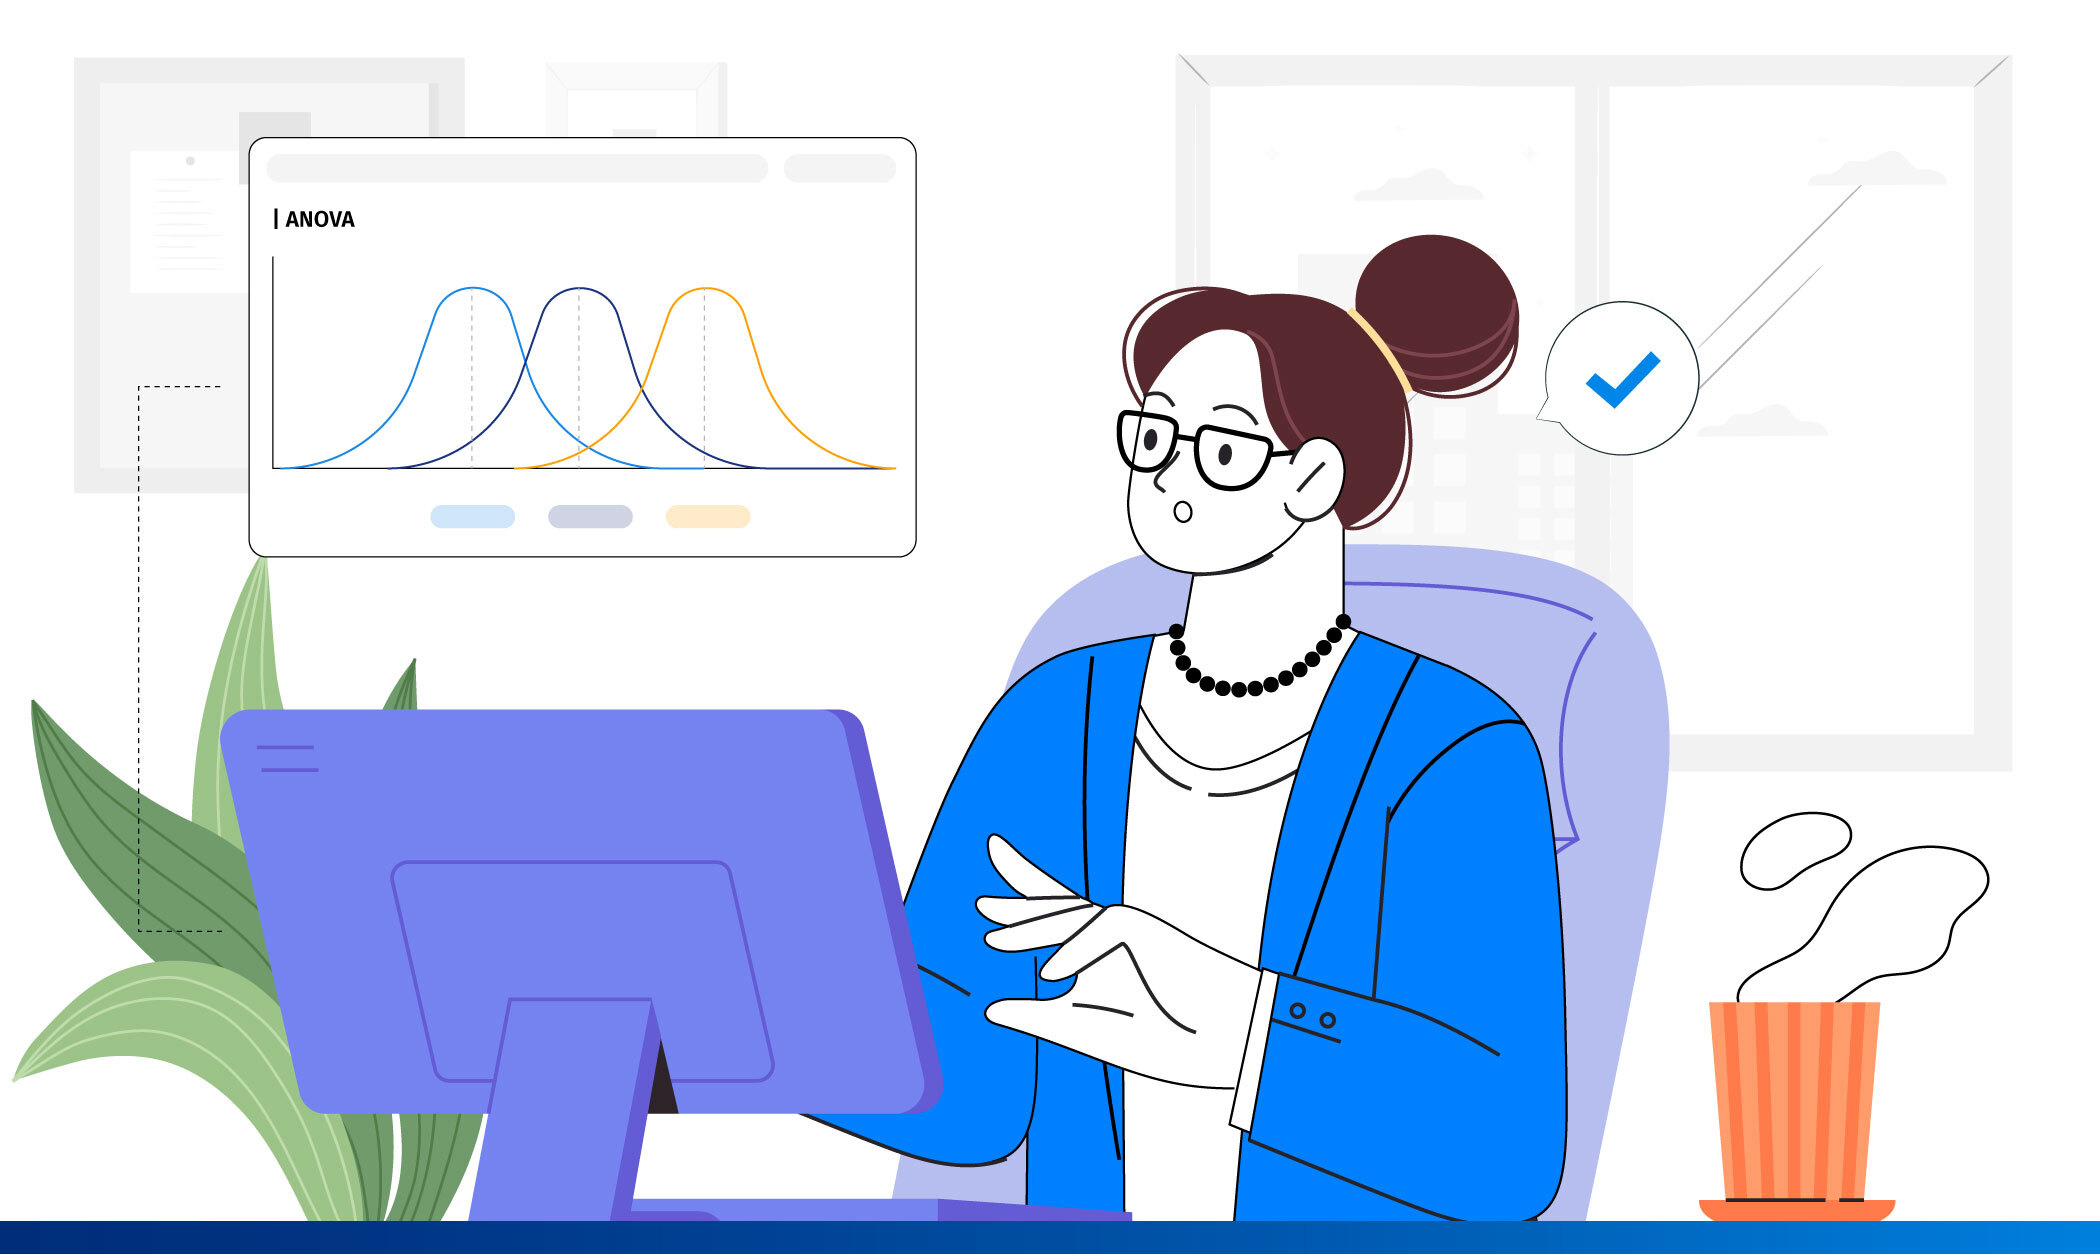

## Teste de Hipóteses

Feita uma afirmação sobre uma população, usualmente sobre um parâmetro, gostaríamos de saber se os resultados experimentais contrariam ou não tal afirmação.

É importante definir a hipótese que estamos colocando à prova $H_0$ e qual hipótese será considerada aceitável, caso $H_0$ seja rejeitada.

*   $H_0$: **hipótese nula**
*   $H_1$: **hipótese alternativa**



### Valor-p

Valor-p, também chamado nível descritivo do teste ou probabilidade de significância do teste, indica a *probabilidade de ocorrer valores da estatística mais extremos (ou igual) ao observado*, sob a hipótese de $H_0$ ser verdadeira.

Usado como régua para tomada de decisão: Escala de evidência de Fisher

*    Baixo valor-p $⇒$ Rejeitar $H_0$

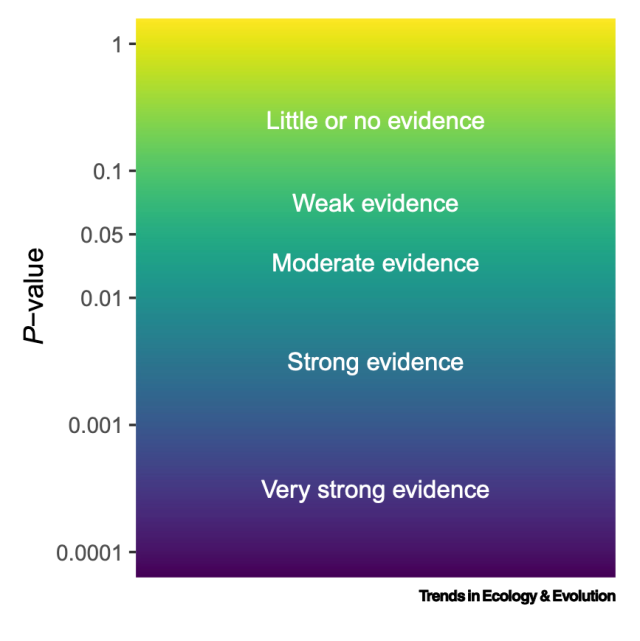

No geral, o valor de "corte" mais usado para o valor-p é de 0.05:

*   Valor-p < 0.05 $⇒$ Rejeitar $H_0$

## ANOVA (de um fator)

O teste ANOVA é um teste de hipóteses ...

**Problema**: Avaliar a igualdade de *médias* de 3 ou mais grupos independentes, ou seja, se há diferenças significativas entre as médias de três ou mais grupos independentes.

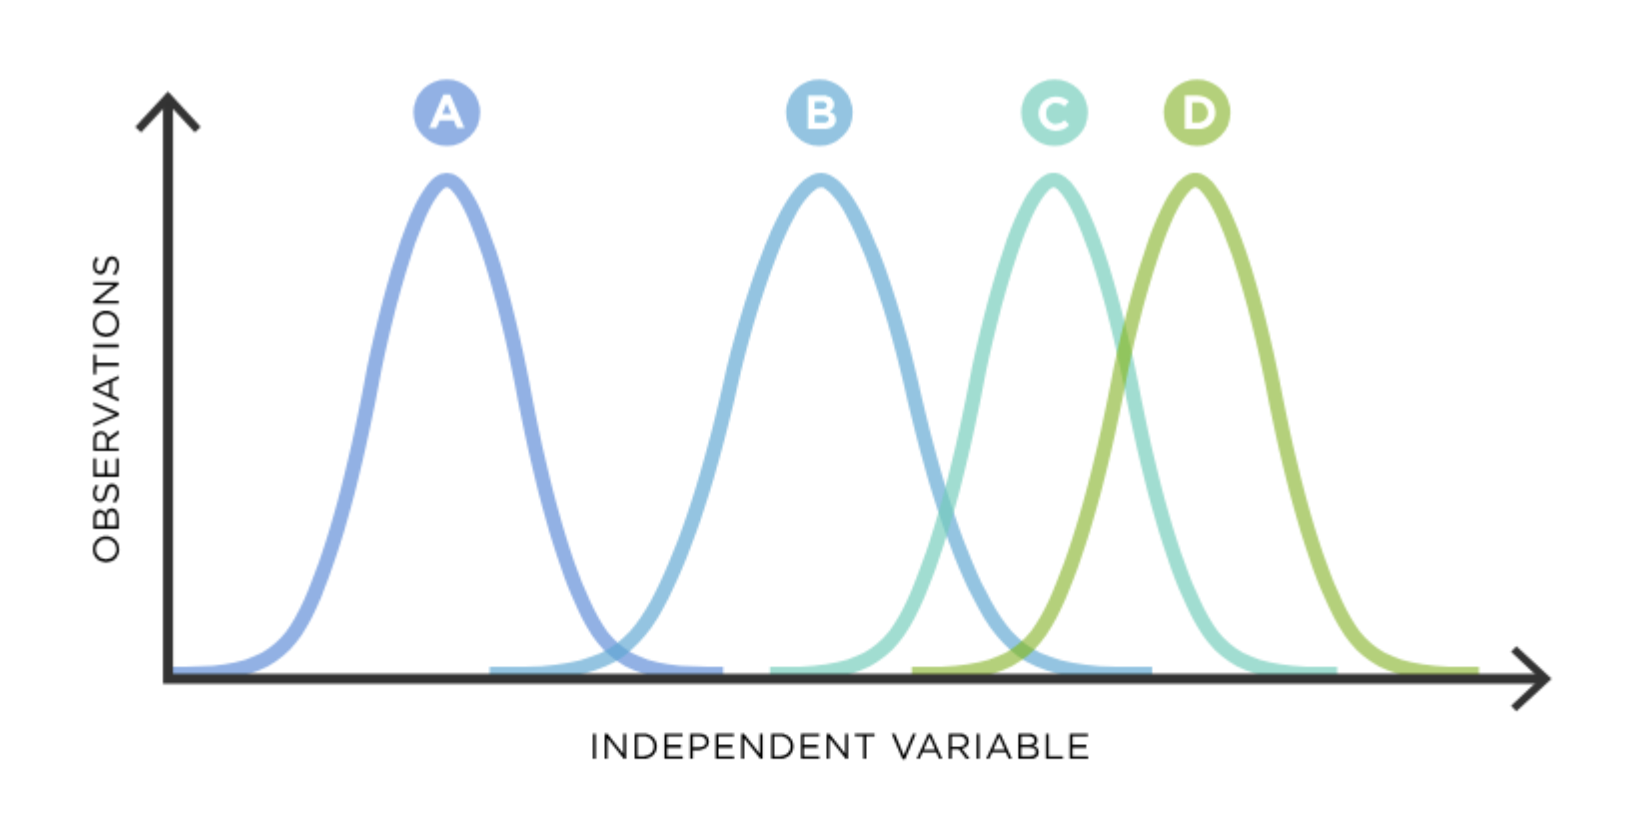

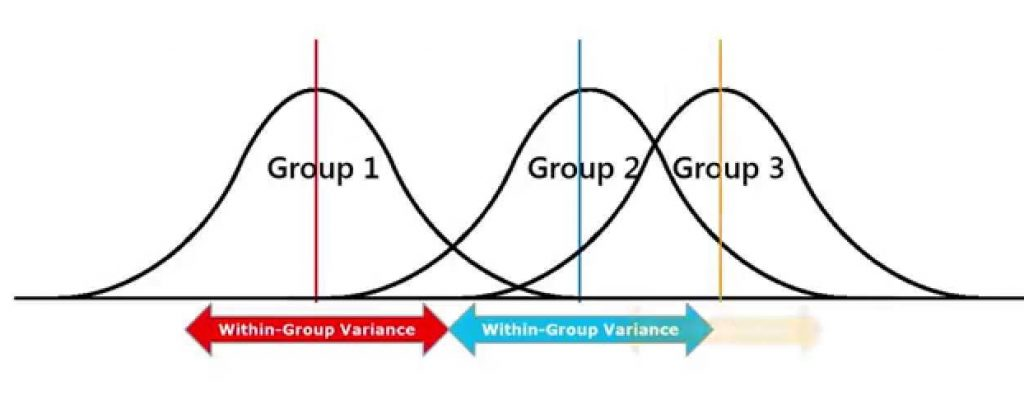

O modelo considera a **variância**...

**Distribuição F**

### Tipos de dados

Use uma ANOVA de um fator (unidirecional) quando tiver coletado dados sobre uma **variável independente categórica** e uma **variável dependente quantitativa**. A variável independente deve ter pelo menos três níveis (ou seja, pelo menos três grupos ou categorias diferentes).

### Suposições do modelo   



1.   Observações independentes
2.   Normalidade na distribuição dos dados   
3.   Todas as populações tem a mesma variância (homocedasticidade)

### Passo-a-passo ANOVA



1.   Cálculo da média para cada grupo
2.   Encontrar a estatística F observada
3.   Aplicação da regra de decisão
4.   Conclusão do teste de hipótese



# Aplicações ANOVA

In [ ]:
# Bibliotecas e pacotes
import pandas as pd
import matplotlib.pyplot as plt

## Exemplo 1:

In [58]:
# Leitura dos dados
dados = pd.read_csv('https://raw.githubusercontent.com/amanda-araujo/inferencia-estatistica/main/Diet_R.csv', sep=',')
dados

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
85,86,1,40,167,87,3,77.8
86,87,1,51,175,88,3,81.9
87,88,1,25,155,74,3,68.5
88,89,1,36,168,81,3,76.6


## Exemplo 2: Agricultura

**Problema**: A partir de xxx dados, descobrir You independent variable is type of fertilizer, and you treat crop fields with mixtures 1, 2 and 3 to find out if there is a difference in crop yield.

*  Variável independente categórica: tipo de fertilizante
*  Variável dependente quantitativa: rendimento da plantação

Leitura e exploração descritiva dos dados.

In [57]:
# Leitura dos dados
dados = pd.read_csv('https://raw.githubusercontent.com/amanda-araujo/inferencia-estatistica/main/crop.data.csv', sep=',')
dados

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486
...,...,...,...,...
91,2,4,3,177.405292
92,1,1,3,178.141644
93,2,2,3,177.710613
94,1,3,3,177.687264


In [55]:
# Medidas descritivas dos dados
dados.describe()

,density,block,fertilizer,yield
count,96.000000,96.000000,96.000000,96.000000
mean,1.500000,2.500000,2.000000,177.015476
std,0.502625,1.123903,0.820783,0.664548
min,1.000000,1.000000,1.000000,175.360840
25%,1.000000,1.750000,1.000000,176.468696
50%,1.500000,2.500000,2.000000,177.058105
75%,2.000000,3.250000,3.000000,177.398571
max,2.000000,4.000000,3.000000,179.060899


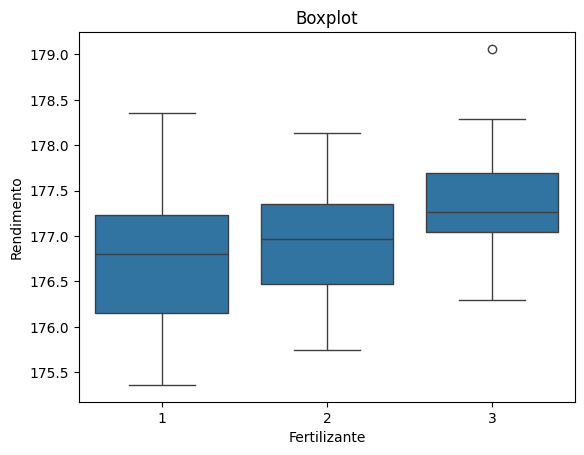

In [43]:
# Visualização exploratória do dados: boxplot
import seaborn as sns
sns.boxplot(data=dados, y='yield', x='fertilizer')
plt.xlabel("Fertilizante")
plt.ylabel("Rendimento")
plt.title("Boxplot")
plt.show()

In [52]:
dados1 = dados[dados['fertilizer']==1]['yield']
dados2 = dados[dados['fertilizer']==2]['yield']
dados3 = dados[dados['fertilizer']==3]['yield']

Teste para ver se os dados estão de acordo com a suposição de normalidade do teste ANOVA

In [54]:
# Verificando a normalidade dos dados
from scipy import stats

shapiro_test, p1 = stats.shapiro(dados1)
shapiro_test, p2 = stats.shapiro(dados2)
shapiro_test, p3 = stats.shapiro(dados3)

print(p1, p2, p3)

# Vamos supor, para a aplicação do teste, que é razoável supor a normalidade e que os dados tem a mesma variância -

0.7743129134178162 0.8874932527542114 0.254195898771286


In [53]:
# Teste ANOVA
from scipy.stats import f_oneway
''' Perform one-way ANOVA.
The one-way ANOVA tests the null hypothesis that two or more groups have the same
population mean. The test is applied to samples from two or more groups, possibly
with differing sizes.'''

F, p = f_oneway(dados1, dados2, dados3)

print("Estatística F observada:", F)
print("Valor-p:", p)

Estatística F observada: 7.862751645215487
Valor-p: 0.0006999157502874401


Aplicação da regra de decisão


*   Valor-p observado < 0.05: 0.0006999 < 0.05
*   Logo, rejeita-se a hipótese nula



**Conclusão**: Temos fortes evidências na amostra para rejeitar que as médias das métricas podem ser consideradas iguais.

# Limitações teste ANOVA



*   Item da lista
*   Item da lista



# Conclusões